## EDA Student Performance Indicator
# 1) Problem statement
* This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
# 2) Data Collection
* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* The data consists of 8 column and 1000 rows.
# 3) Dataset Information
* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read the dataset
df = pd.read_csv('https://raw.githubusercontent.com/mk-azad/EDA_With_Students_Performance_Indicator/main/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.shape

(1000, 8)

# 3. Data Checks to Perform
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

In [ ]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

# Insights or Observation
* There are no missing values

In [ ]:
## Check Duplicates
df.duplicated().sum()

0

* There is no duplicate value in the dataset

In [ ]:
## Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
## 3.1 Checking the number of unique values of each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [ ]:
## Check the statistics of the dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Checking the Data Distribution

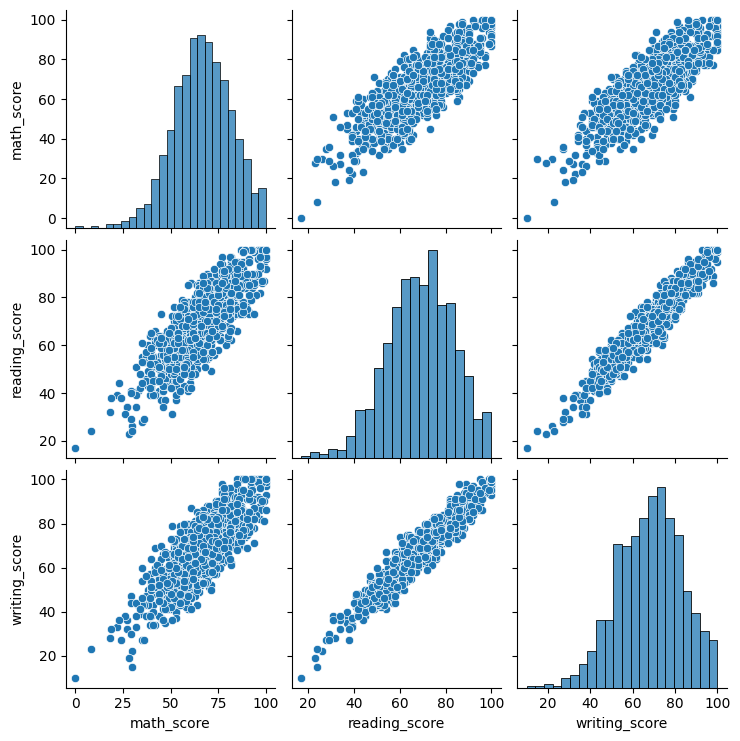

In [ ]:
sns.pairplot(df)

# Insights or Observation
* From the above description of numerical data,all means are very close to each other- between 66 and 68
* All the standard deviation are also close- between 15.16- 15.19
* While there is a minimum of 0 for maths,other are having 17 and 10 value as minimum in reading and writing
* From the pairplot, we can see that it is normally distributed with minimal number of outliers

In [ ]:
## Explore more info about the data
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
#segrregate numberical and categorical features
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

In [ ]:
numerical_features

['math_score', 'reading_score', 'writing_score']

In [ ]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

## Getting the Total Score by adding 3 features

In [ ]:
# Aggregate the tool score with mean

df['total score']=(df['math_score']+df['reading_score']+df['writing_score'])
df['average']=df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [ ]:
df = df.drop(['math_score','reading_score','writing_score'], axis=1)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,total score,average
0,female,group B,bachelor's degree,standard,none,218,72.666667
1,female,group C,some college,standard,completed,247,82.333333
2,female,group B,master's degree,standard,none,278,92.666667
3,male,group A,associate's degree,free/reduced,none,148,49.333333
4,male,group C,some college,standard,none,229,76.333333


## Insights and Observation
- Dropped 3 features as we got our target variable and won't work further with those 3 dropped features

## Checking the distribution of target feature

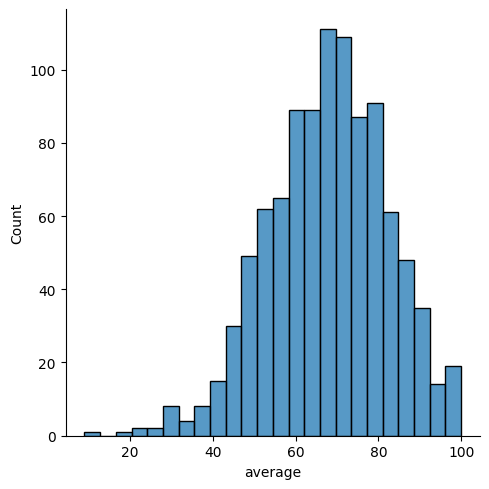

In [ ]:
sns.displot(df['average'])

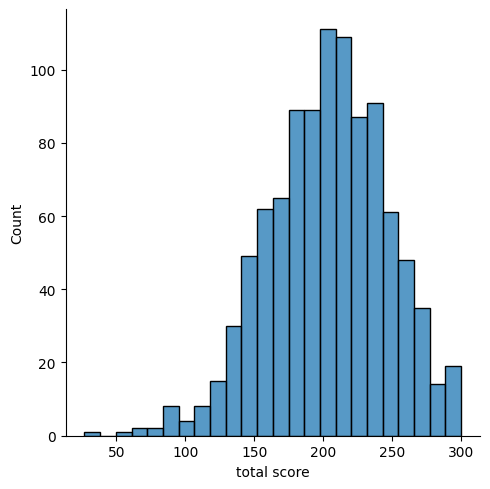

In [ ]:
sns.displot(df['total score'])

<Axes: >

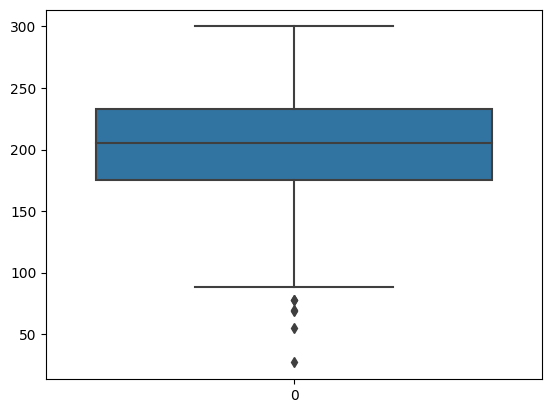

In [ ]:
sns.boxplot(df['total score'])

<Axes: >

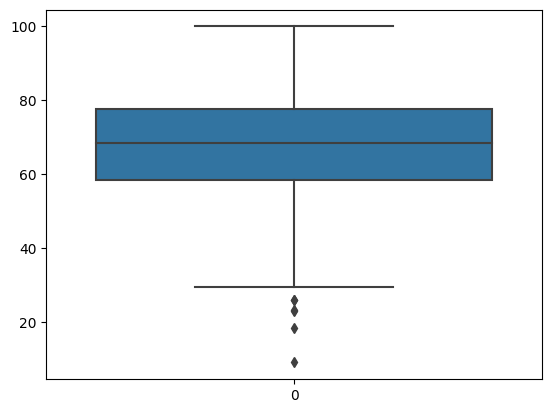

In [ ]:
sns.boxplot(df['average'])

## Insight and Observation
- The target feature has minimal amount of outliers.

## Removing Outliers

In [ ]:
def remove_outliers_iqr(df, threshold=1.5):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (threshold * IQR)
    upper_bound = Q3 + (threshold * IQR)
    cleaned_df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    return cleaned_df

In [ ]:
cleaned_df = remove_outliers_iqr(df)

In [ ]:
print(f"DataFrame Shape With Outliers: {df.shape}")
print(f"DataFrame Shape Without Outliers: {cleaned_df.shape}")

DataFrame Shape With Outliers: (1000, 7)
DataFrame Shape Without Outliers: (994, 7)


## Insights and Observation
- Before removing the outliers, the DataFrame Shape With Outliers: (1000, 7)
- After removing the outliers, the DataFrame Shape Without Outliers: (994, 7)

<Axes: >

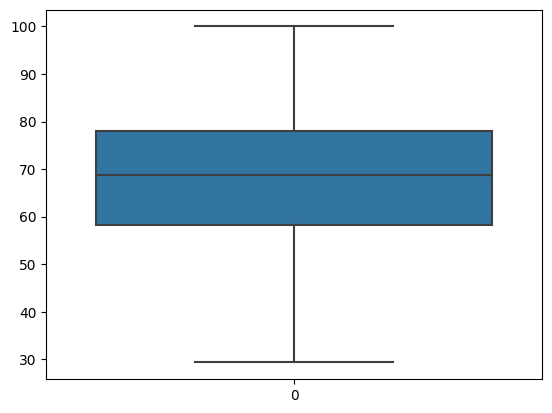

In [ ]:
sns.boxplot(cleaned_df['average'])

<Axes: >

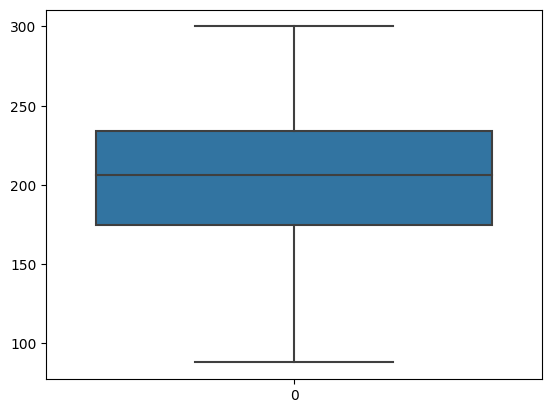

In [ ]:
sns.boxplot(cleaned_df['total score'])

In [ ]:
cleaned_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,total score,average
0,female,group B,bachelor's degree,standard,none,218,72.666667
1,female,group C,some college,standard,completed,247,82.333333
2,female,group B,master's degree,standard,none,278,92.666667
3,male,group A,associate's degree,free/reduced,none,148,49.333333
4,male,group C,some college,standard,none,229,76.333333


## Doing Standardization

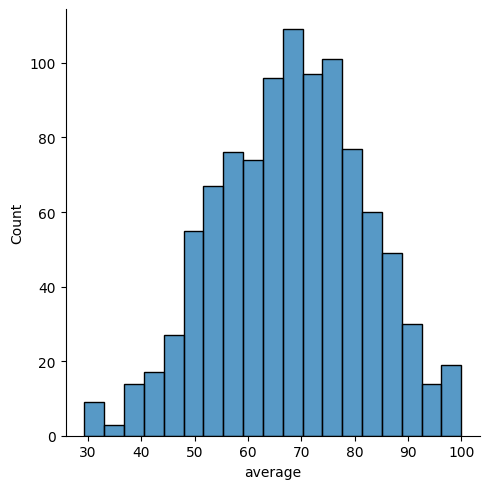

In [ ]:
sns.displot(cleaned_df['average'])

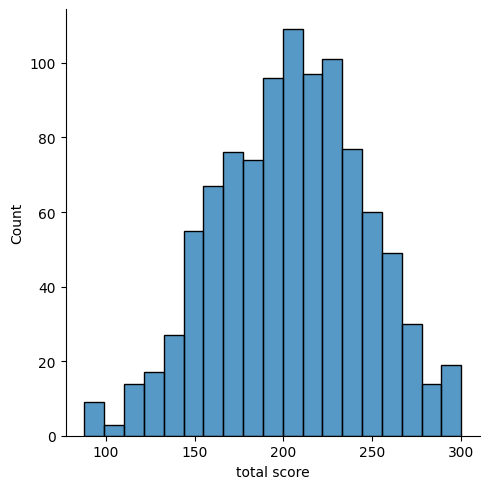

In [ ]:
sns.displot(cleaned_df['total score'])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler

StandardScaler()

In [ ]:
standardized_avg_score = scaler.fit_transform(cleaned_df[['average']])
standardized_total_score = scaler.fit_transform(cleaned_df[['total score']])

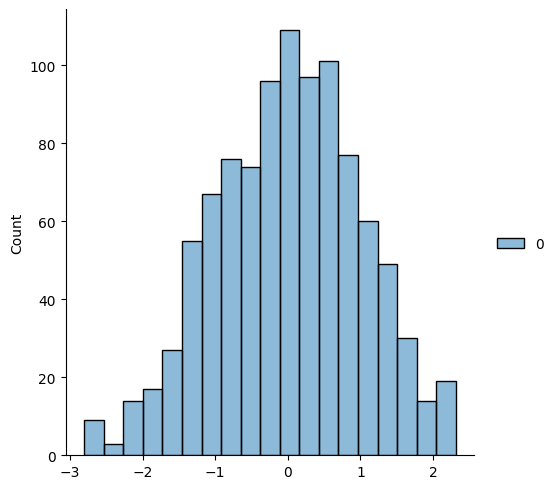

In [ ]:
sns.displot(standardized_avg_score, legend='False')

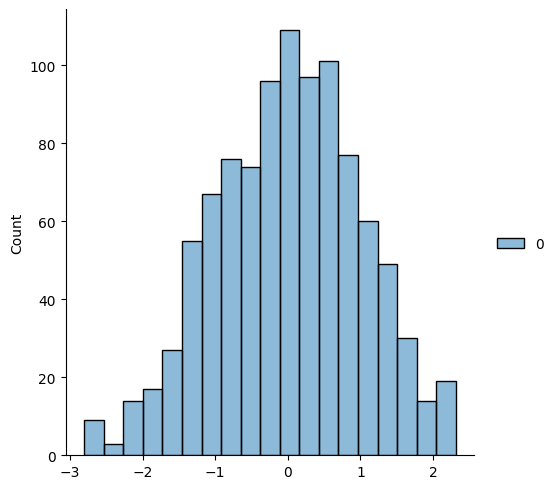

In [ ]:
sns.displot(standardized_total_score)

## Dropping the average as we don't intend to work with this feature

In [ ]:
cleaned_df.drop('average', axis=1, inplace=True)

In [ ]:
cleaned_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,total score
0,female,group B,bachelor's degree,standard,none,218
1,female,group C,some college,standard,completed,247
2,female,group B,master's degree,standard,none,278
3,male,group A,associate's degree,free/reduced,none,148
4,male,group C,some college,standard,none,229


## Doing feature engineering of Parental Level Education

In [ ]:
cleaned_df['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [ ]:
cleaned_df['parental_level_of_education'].value_counts()

some college          225
associate's degree    222
high school           194
some high school      176
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

In [ ]:
cleaned_df['parental_level_of_education'] = cleaned_df['parental_level_of_education'].replace('some high school', 'high school')

In [ ]:
cleaned_df['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school'], dtype=object)

In [ ]:
cleaned_df['parental_level_of_education'].value_counts()

high school           370
some college          225
associate's degree    222
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

In [ ]:
#cleaned_df['parental_level_of_education'] = cleaned_df['parental_level_of_education'].replace(("master's degree","bachelor's degree","associate's degree","some college","high school"),(5,4,3,2,1))

In [ ]:
#cleaned_df['parental_level_of_education'].value_counts()

In [ ]:
cleaned_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,total score
0,female,group B,bachelor's degree,standard,none,218
1,female,group C,some college,standard,completed,247
2,female,group B,master's degree,standard,none,278
3,male,group A,associate's degree,free/reduced,none,148
4,male,group C,some college,standard,none,229


In [ ]:
## Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
encoder=OrdinalEncoder(categories=[["high school", "some college", "associate's degree","bachelor's degree","master's degree"]])

In [ ]:
cleaned_df['parental_level_of_education']=encoder.fit_transform(cleaned_df[['parental_level_of_education']])

## Encoding part for Categorical Variable

In [ ]:
cleaned_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,total score
0,female,group B,3.0,standard,none,218
1,female,group C,1.0,standard,completed,247
2,female,group B,4.0,standard,none,278
3,male,group A,2.0,free/reduced,none,148
4,male,group C,1.0,standard,none,229


In [ ]:
cleaned_df['gender'].unique()

array(['female', 'male'], dtype=object)

## Observation: # We will do label encoding here as the labels are usually assigned in alphabetical order or based on the frequency of the categories. Here we have categorical variable "gender" with two possible values (male and female). At the same time, we have race_ethnicity, lunch and test preparetion. We can represent these features using label encoding as follows:

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cleaned_df['gender'] = le.fit_transform(cleaned_df['gender'])
cleaned_df['race_ethnicity'] = le.fit_transform(cleaned_df['race_ethnicity'])
cleaned_df['lunch'] = le.fit_transform(cleaned_df['lunch'])
cleaned_df['test_preparation_course'] = le.fit_transform(cleaned_df['test_preparation_course'])

In [ ]:
cleaned_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,total score
0,0,1,3.0,1,1,218
1,0,2,1.0,1,0,247
2,0,1,4.0,1,1,278
3,1,0,2.0,0,1,148
4,1,2,1.0,1,1,229


## Pearson Correlation

In [ ]:
cleaned_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,total score
0,0,1,3.0,1,1,218
1,0,2,1.0,1,0,247
2,0,1,4.0,1,1,278
3,1,0,2.0,0,1,148
4,1,2,1.0,1,1,229


In [ ]:
cleaned_df.corr()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,total score
gender,1.000000,-0.002257,-0.049915,0.019652,-0.006220,-0.136474
race_ethnicity,-0.002257,1.000000,0.089917,0.038895,-0.014975,0.180435
parental_level_of_education,-0.049915,0.089917,1.000000,-0.028388,-0.009405,0.205406
lunch,0.019652,0.038895,-0.028388,1.000000,0.021691,0.280245
test_preparation_course,-0.006220,-0.014975,-0.009405,0.021691,1.000000,-0.250750
total score,-0.136474,0.180435,0.205406,0.280245,-0.250750,1.000000


<Axes: >

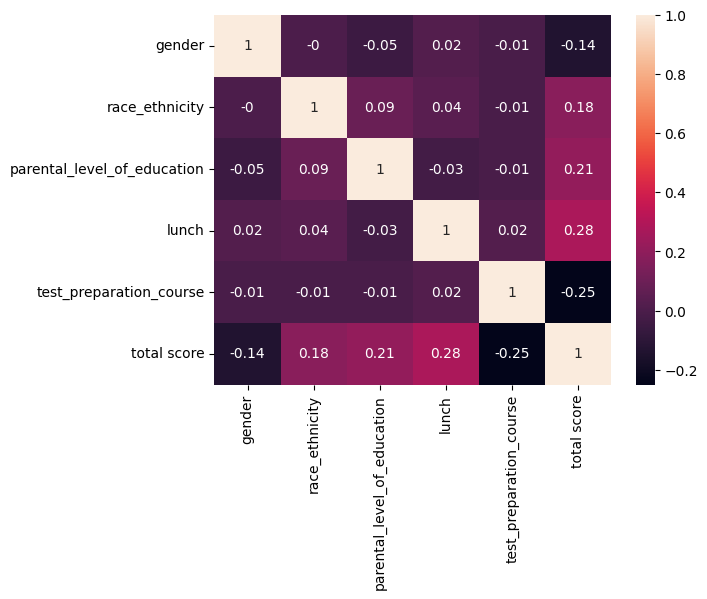

In [ ]:
sns.heatmap(round(cleaned_df.corr(), 2), annot = True)

## Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df1 = cleaned_df.head()

In [ ]:
df1

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,total score
0,0,1,3.0,1,1,218
1,0,2,1.0,1,0,247
2,0,1,4.0,1,1,278
3,1,0,2.0,0,1,148
4,1,2,1.0,1,1,229


In [ ]:
X=df1.drop(['total score'], axis=1)
y=df1['total score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 26)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([ 6.75015599e-14,  7.45000000e+01,  6.00000000e+01,  0.00000000e+00,
       -7.45000000e+01])

In [ ]:
model.intercept_

37.999999999999886

In [ ]:
cdf = pd.DataFrame(model.coef_, X.columns, columns = ['coef'])
cdf

,coef
gender,6.750156e-14
race_ethnicity,7.450000e+01
parental_level_of_education,6.000000e+01
lunch,0.000000e+00
test_preparation_course,-7.450000e+01


In [ ]:
predictions = model.predict(X_test)
predictions

array([172.5,  83.5])

In [ ]:
diff = abs(predictions - y_test)
diff

4    56.5
3    64.5
Name: total score, dtype: float64

In [ ]:
diff.mean()

60.49999999999997

## Regression Evaluation Metrics

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
MAE = metrics.mean_absolute_error(y_test, predictions)
MAE

60.49999999999997

In [ ]:
MSE = metrics.mean_squared_error(y_test, predictions)
MSE

3676.249999999997

In [ ]:
RMSE = np.sqrt(MSE)
RMSE

60.63208721460937

In [ ]:
r2= metrics.r2_score(y_test, predictions)
r2

-1.2412741960067044

In [ ]:
import statsmodels.api as sm

In [ ]:
model1= sm.OLS(y,X)

In [ ]:
model1.fit().summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            total score   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              337.9
Date:                Sun, 10 Sep 2023   Prob (F-statistic):                      0.0408
Time:                        06:39:23   Log-Likelihood:                         -16.220
No. Observations:                   5   AIC:                                      40.44
Df Residuals:                       1   BIC:                                      38.88
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
gender                         77.5974     16.566      4.684      0.134    -132.900     288.095
race_ethnicity                 99.4026      9.060     10.972      0.058     -15.716     214.522
parental_level_of_education    76.7273     10.243      7.490      0.084     -53.426     206.881
lunch                         -32.7143     17.273     -1.894      0.309    -252.190     186.761
test_preparation_course       -87.2338     27.642     -3.156      0.195    -438.464     263.996
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.091
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.522
Skew:                          -0.348   Prob(JB):                        0.770
Kurtosis:                       1.578   Cond. No.                     5.28e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.53e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""